In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (8, 5)

# World Happiness Report - data analysis and visualization

Exploratory data analysis of World Happiness Report dataset - a survey of the state of global happiness.
Following features are included in the data:
- Country name: Name of the country.
- Regional indicator: Region to which the country belongs.
- Ladder score: The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0.
- Upper whisker: Upper bound of the happiness score.
- Lower whisker: Lower bound of the happiness score.
- Log GDP per capita: The natural logarithm of the country's GDP per capita, adjusted for purchasing power parity (PPP) to account for differences in the cost of living between countries.
- Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.
- Healthy life expectancy: The average number of years a newborn infant would live in good health, based on mortality rates and life expectancy at different ages.
- Freedom to make life choices: The national average of responses to the question about satisfaction with freedom to choose what to do with one's life.
- Generosity: The residual of regressing the national average of responses to the question about donating money to charity on GDP per capita.
- Perceptions of corruption: The national average of survey responses to questions about the perceived extent of corruption in the government and businesses.
- Dystopia + residual: Dystopia is an imaginary country with the world’s least-happy people, used as a benchmark for comparison. The dystopia + residual score is a combination of the Dystopia score and the unexplained residual for each country, ensuring that the combined score is always positive. Each of these factors contributes to the overall happiness score, but the Dystopia + residual value is a benchmark that ensures no country has a lower score than the hypothetical Dystopia.
- Positive affect: The national average of responses to questions about positive emotions experienced yesterday.
- Negative affect: The national average of responses to questions about negative emotions experienced yesterday.

Source of data and feature explanation: [World Happiness Report](https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated)

In [2]:
data_2024 = pd.read_csv('./data/World-happiness-report-2024.csv')
data_history = pd.read_csv('./data/World-happiness-report-updated_2024.csv', encoding='latin1')

In [3]:
data_2024.head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [4]:
data_history.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.059,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.102,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.078,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.040,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371


In [5]:
print(f"2024 data shape: {data_2024.shape}")
print(f"History data shape: {data_history.shape}")

2024 data shape: (143, 12)
History data shape: (2363, 11)


In [6]:
print(f"Data types:")
data_2024.info()

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


Let's check descriptive statistics of the data.

In [7]:
data_2024.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


## Ladder score
To understand the happiness score better, let's look at its distribution.

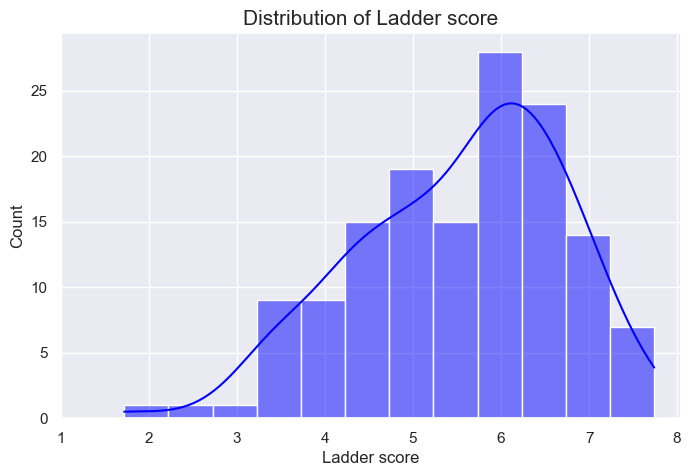

In [8]:
plt.figure()
sns.histplot(data_2024['Ladder score'], color='blue',
             bins=12, kde=True)
plt.xticks(np.arange(1, 9, 1))
plt.title('Distribution of Ladder score',
          fontsize=15)
plt.show()

In [9]:
print(f"Maximum of Ladder score: {data_2024['Ladder score'].max()}\
      \nMinimum of Ladder score: {data_2024['Ladder score'].min()}\
      \nCountry with highest Ladder score: {data_2024.loc[data_2024['Ladder score'].idxmax()]['Country name']}\
      \nCountry with lowest Ladder score: {data_2024.loc[data_2024['Ladder score'].idxmin()]['Country name']}\
      \nSkewness of Ladder score: {stats.skew(data_2024['Ladder score'])}")

Maximum of Ladder score: 7.741      
Minimum of Ladder score: 1.721      
Country with highest Ladder score: Finland      
Country with lowest Ladder score: Afghanistan      
Skewness of Ladder score: -0.5163301090682643


Despite the score being a value between 0 and 10, values present in the data are between 1.721 (for Afghanistan) and 7.741 (for Finland). The average happiness score is 5.527. The distribution is rightly skewed.

## Features correlations

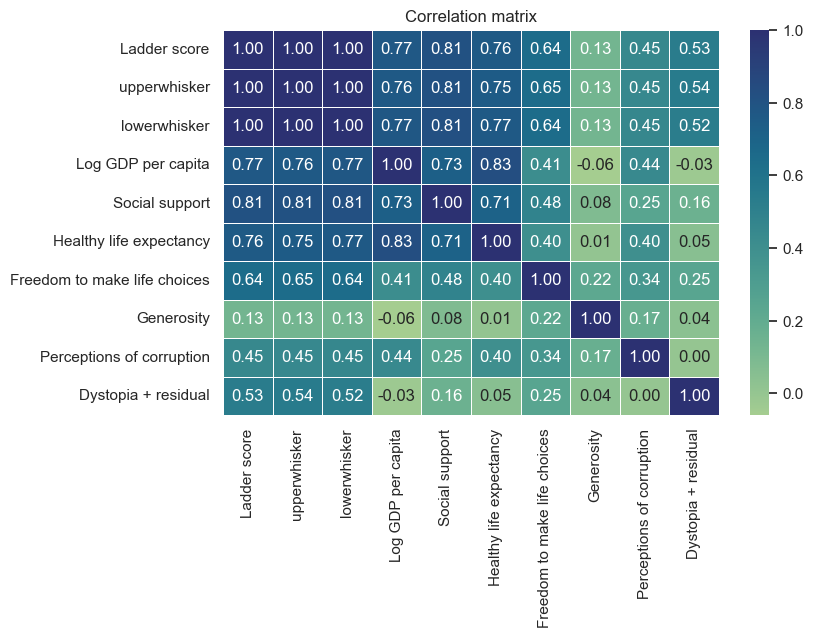

In [10]:
plt.figure()
sns.heatmap(data_2024.corr(numeric_only=True), annot=True,
            cmap='crest', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

We can see that Ladder score is highly (and positively) correlated with Log GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices. We'll visualize these relationships in the following sections.

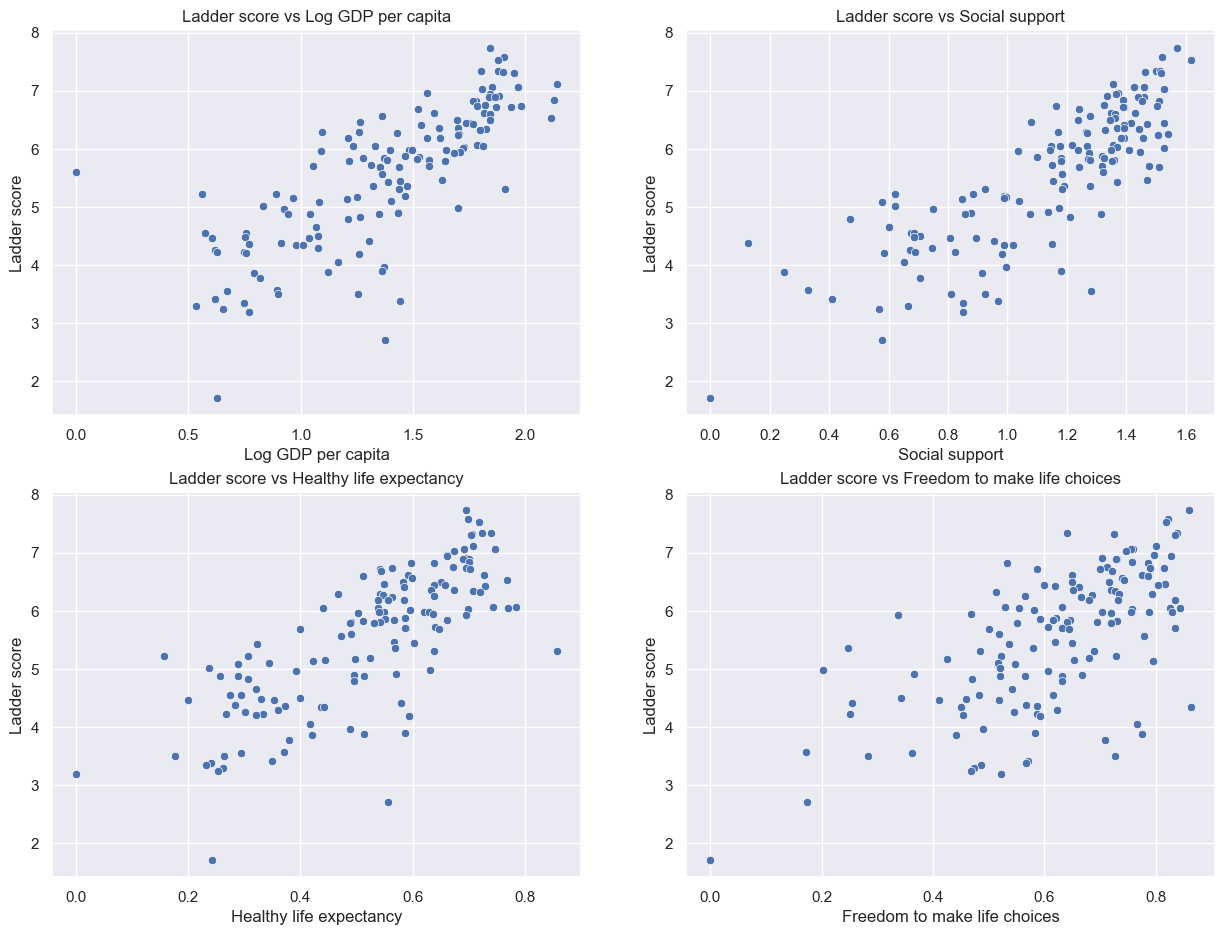

In [11]:
features_to_plot = ['Log GDP per capita', 'Social support',
                    'Healthy life expectancy', 'Freedom to make life choices']

fig, ax = plt.subplots(2, 2, figsize=(15, 11))

for i, col in enumerate(features_to_plot):
    sns.scatterplot(x=col, y='Ladder score', data=data_2024,
                    ax=ax[i//2, i % 2])
    ax[i//2, i % 2].set_title(f'Ladder score vs {col}')

plt.show()

We can clearly see that these features being at higher level has a positive impact on the happiness score.

## Happiness in different regions of the world

In [12]:
data_2024.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [13]:
data_2024_by_region = data_2024.drop('Country name', axis=1).groupby('Regional indicator').mean().reset_index()
print(f"Shape of regional data: {data_2024_by_region.shape}")
data_2024_by_region.head()

Shape of regional data: (10, 11)


,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Central and Eastern Europe,6.170941,6.267529,6.074235,1.637765,1.390706,0.610412,0.650471,0.135353,0.089353,1.656706
1,Commonwealth of Independent States,5.538500,5.637500,5.439400,1.401000,1.254556,0.543556,0.697444,0.143111,0.122333,1.404667
2,East Asia,5.934333,6.022667,5.846333,1.700333,1.302000,0.681833,0.587667,0.122167,0.200000,1.340833
3,Latin America and Caribbean,6.143368,6.268263,6.018474,1.328211,1.267316,0.571158,0.703263,0.106789,0.109211,2.057474
4,Middle East and North Africa,5.199941,5.312294,5.087529,1.460533,1.084200,0.553200,0.493667,0.108000,0.146067,1.325067


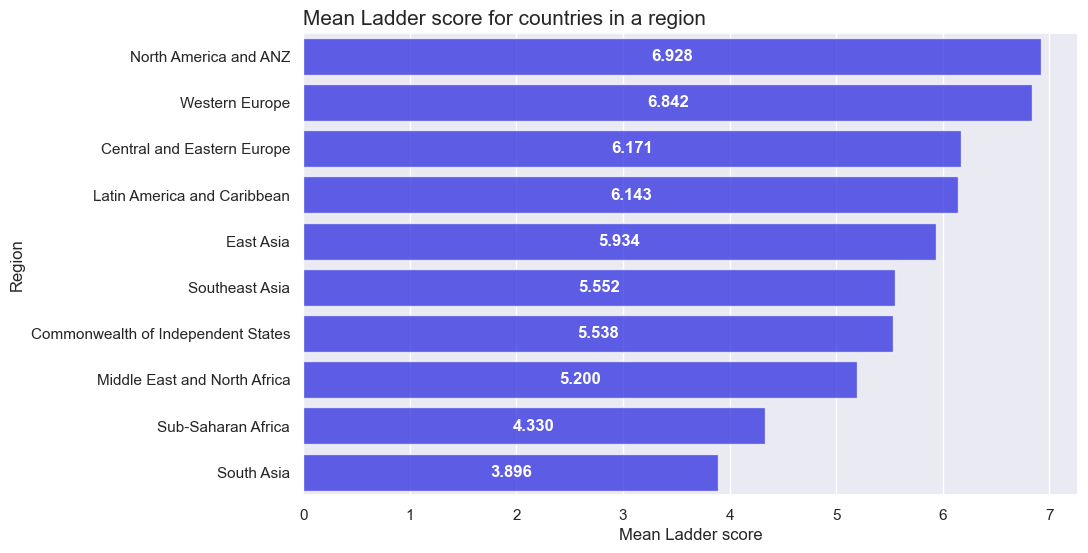

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Ladder score', y='Regional indicator', data=data_2024_by_region,
            color='blue', alpha=0.7,
            order=data_2024_by_region.sort_values('Ladder score', 
                                                  ascending=False)['Regional indicator'])
plt.title('Mean Ladder score for countries in a region',
          fontsize=15, loc='left')
ax.bar_label(ax.containers[0], fmt='%.3f',
             color='white', label_type='center',
             fontsize=12, weight='bold')
ax.set_xlabel('Mean Ladder score')
ax.set_ylabel('Region')
plt.show()

Based on the happiness score, we can see that European and North American countries are the happiest, while African and South Asian countries are the least happy.

## Corruption in Western vs Eastern Europe

Interesting comparison I decided to make is the perception of corruption in Western and Eastern Europe.

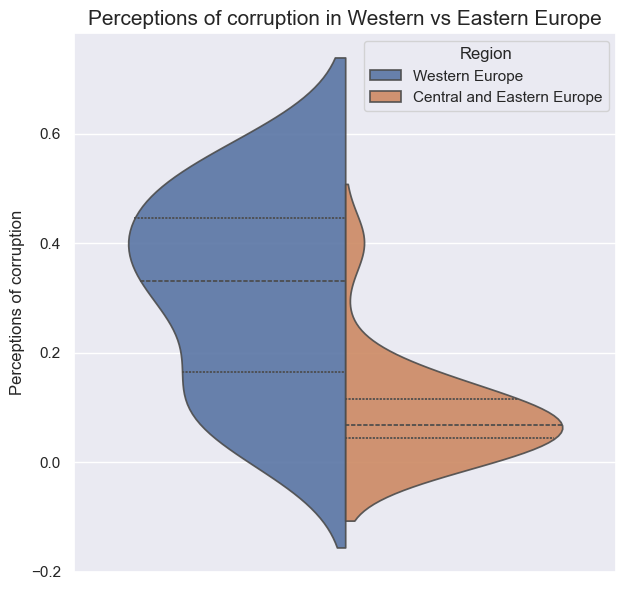

In [15]:
data_2024_europe = data_2024[(data_2024['Regional indicator'] == 'Western Europe') |
                             (data_2024['Regional indicator'] == 'Central and Eastern Europe')]

plt.figure(figsize=(7, 7))
sns.violinplot(y='Perceptions of corruption', data=data_2024_europe, 
               hue='Regional indicator', split=True, inner='quartile',
               alpha=0.9)
plt.title("Perceptions of corruption in Western vs Eastern Europe",
          fontsize=15)
plt.legend(title='Region')
plt.show()

Surprisingly, perceptions of corruption are higher in Western Europe than in Eastern Europe. I find it interesting, because I expected the opposite, that Western European countries have greater public trust and better governance.

## Happiness in Poland
Let's see how Poland is doing in hapiness score compared to other countries, and how it changed over the years.

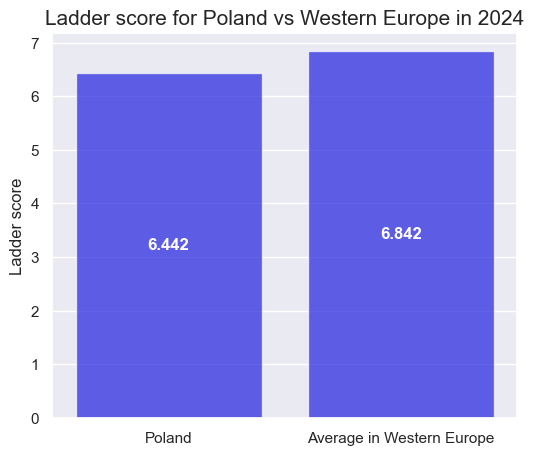

In [16]:
data_poland = data_2024[data_2024['Country name'] == 'Poland']
data_europe = data_2024[data_2024['Regional indicator'] == 'Western Europe']

fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x=['Poland', 'Average in Western Europe'], y=[data_poland['Ladder score'].values[0],
                                                          data_europe['Ladder score'].mean()],
            color='blue', alpha=0.7)
plt.title('Ladder score for Poland vs Western Europe in 2024',
          fontsize=15)
plt.ylabel('Ladder score')
ax.bar_label(ax.containers[0], fmt='%.3f', color='white',
             label_type='center', fontsize=12, weight='bold')
plt.show()

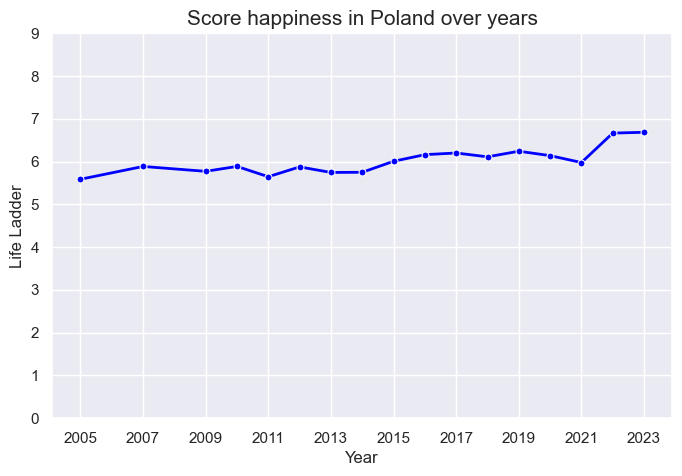

In [17]:
# Histoical level of happiness in Poland
data_history['year'] = data_history['year'].astype(int)

plt.figure()
sns.lineplot(x='year', y='Life Ladder',
             data=data_history[data_history['Country name'] == 'Poland'],
             color='blue', marker='o', markersize=5, linewidth=2)
plt.xticks(np.arange(2005, 2024, 2))
plt.yticks(np.arange(0, 10, 1))
plt.title('Score happiness in Poland over years',
            fontsize=15)
plt.xlabel('Year')
plt.show()

Ladder score for Poland seems to increase over the years, however, it's still below the average score for Western European countries.